In [1]:
import torch
from torchvision import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

In [2]:
class MNISTDataset(datasets.VisionDataset):
    def __init__(self, root: str) -> None:
        super(MNISTDataset, self).__init__(root)
        self.data_label = torch.load(root)
        self.images = []
        self.targets = []
        for image, target in self.data_label:
            self.images.append(np.array(image).flatten())
            self.targets.append(target)
        self.images = np.array(self.images)
        self.targets = np.array(self.targets)

    def __len__(self) -> int:
        return 20000

    def __getitem__(self, index):
        image, target = self.images[index], self.targets[index]
        return image, target

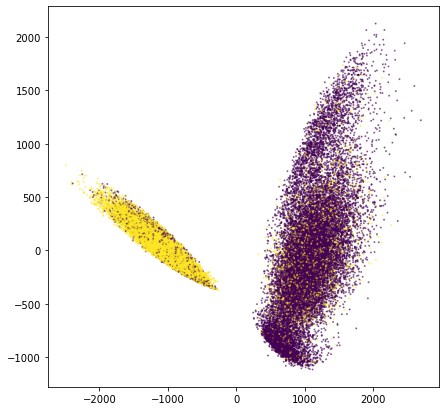

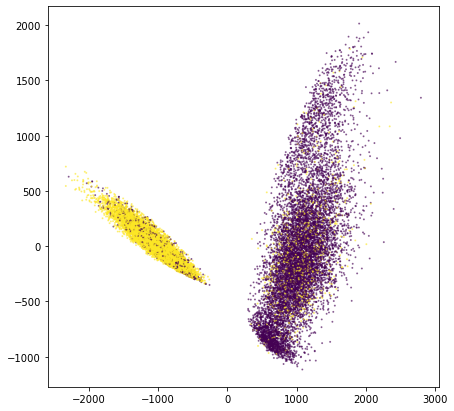

In [3]:
train1 = MNISTDataset('./ColoredMNIST/train1.pt')
train2 = MNISTDataset('./ColoredMNIST/train2.pt')
test = MNISTDataset('./ColoredMNIST/test.pt')

pca = PCA(2)

plt.figure(1, figsize=(7, 7))
train_x = pca.fit_transform(np.concatenate((train1.images, train2.images), axis=0))
train_y = np.concatenate((train1.targets, train2.targets), axis=0)
plt.scatter(train_x[:, 0], train_x[:, 1], c=train_y, s=1, alpha=0.5)
plt.show()

plt.figure(2, figsize=(7, 7))
test_x = pca.fit_transform(test.images)
test_y = test.targets
plt.scatter(test_x[:, 0], test_x[:, 1], c=test_y, s=1, alpha=0.5)
plt.show()

In [7]:
model = RandomForestClassifier(n_estimators=30)
model.fit(train_x, train_y)
predict_y = model.predict(test_x)
print("Accuracy: {}".format(metrics.accuracy_score(predict_y, test_y)))

Accuracy: 0.8744
